In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [29]:
data = pd.read_csv("Downloads/archive (4)/apple.csv")

In [30]:
data.head()

,class,text
0,Pos,Now all @Apple has to do is get swype on the i...
1,Pos,@Apple will be adding more carrier support to ...
2,Pos,Hilarious @youtube video - guy does a duet wit...
3,Pos,@RIM you made it too easy for me to switch to ...
4,Pos,I just realized that the reason I got into twi...


In [31]:
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')

# Use English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Data Cleaning with NLTK stopwords
data['cleaned_text'] = data['text'].str.lower().str.replace(r'[^a-z\s]', '', regex=True)
data['cleaned_text'] = data['cleaned_text'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words)
)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saimi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
data.head()

,class,text,cleaned_text
0,Pos,Now all @Apple has to do is get swype on the i...,apple get swype iphone crack iphone
1,Pos,@Apple will be adding more carrier support to ...,apple adding carrier support iphone announced
2,Pos,Hilarious @youtube video - guy does a duet wit...,hilarious youtube video guy duet apple siri pr...
3,Pos,@RIM you made it too easy for me to switch to ...,rim made easy switch apple iphone see ya
4,Pos,I just realized that the reason I got into twi...,realized reason got twitter ios thanks apple


In [33]:
sentiment_counts = data['class'].value_counts()
sentiment_counts

class
Neutral    509
Neg        316
Pos        163
Name: count, dtype: int64

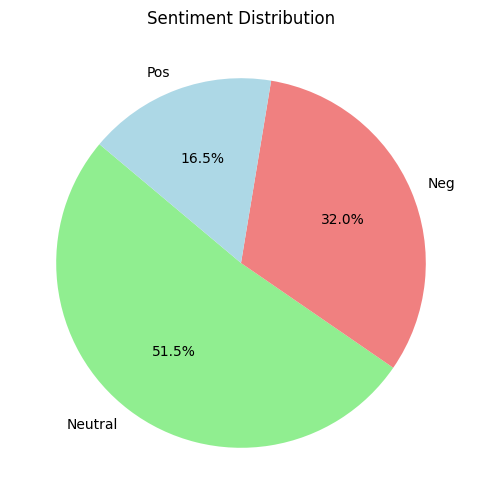

In [39]:
data['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                                  colors=['lightgreen', 'lightcoral','lightblue'], figsize=(8, 6))
plt.title("Sentiment Distribution")
plt.ylabel('')
plt.show()

C:\Users\saimi\AppData\Local\Temp\ipykernel_29740\977290130.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(product_counts.keys()), y=list(product_counts.values()), palette='viridis')


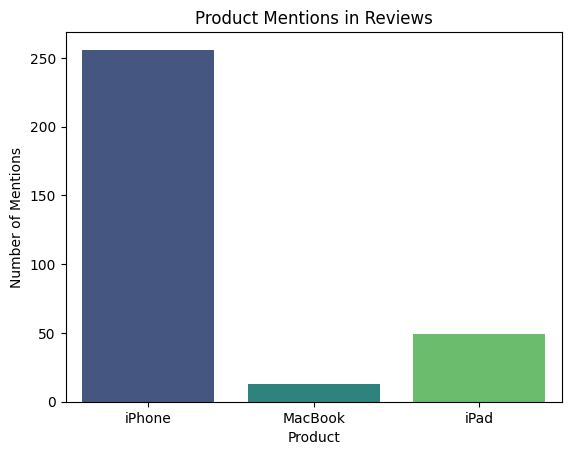

In [37]:
products = ['iPhone', 'MacBook', 'iPad']
product_counts = {product: data['cleaned_text'].str.contains(product, case=False).sum() 
                  for product in products}
sns.barplot(x=list(product_counts.keys()), y=list(product_counts.values()), palette='viridis')
plt.title("Product Mentions in Reviews")
plt.xlabel("Product")
plt.ylabel("Number of Mentions")
plt.show()

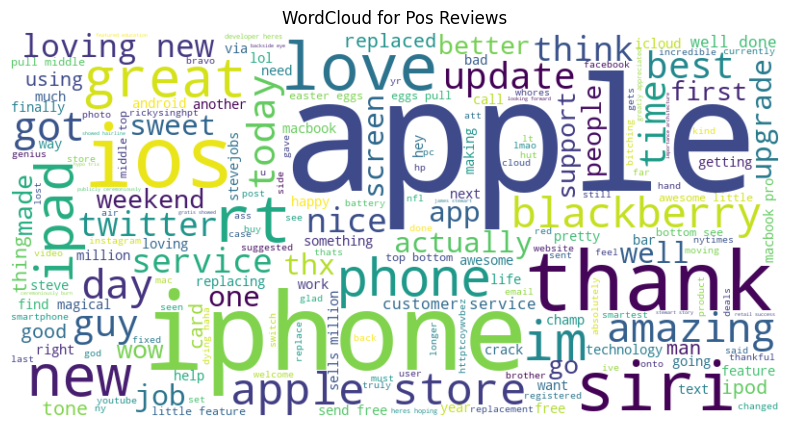

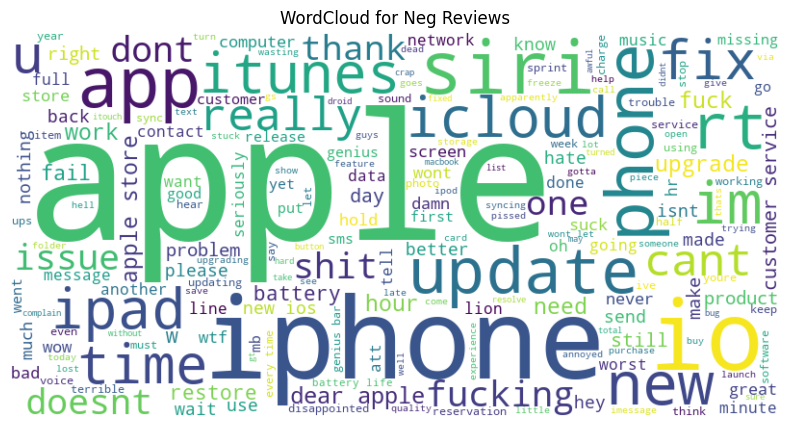

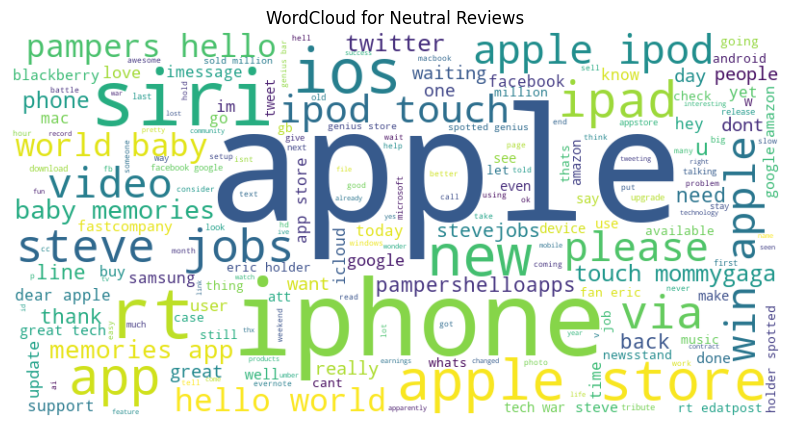

In [40]:
for sentiment in ['Pos', 'Neg','Neutral']:
    text = ' '.join(data[data['class'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment} Reviews")
    plt.show()